In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

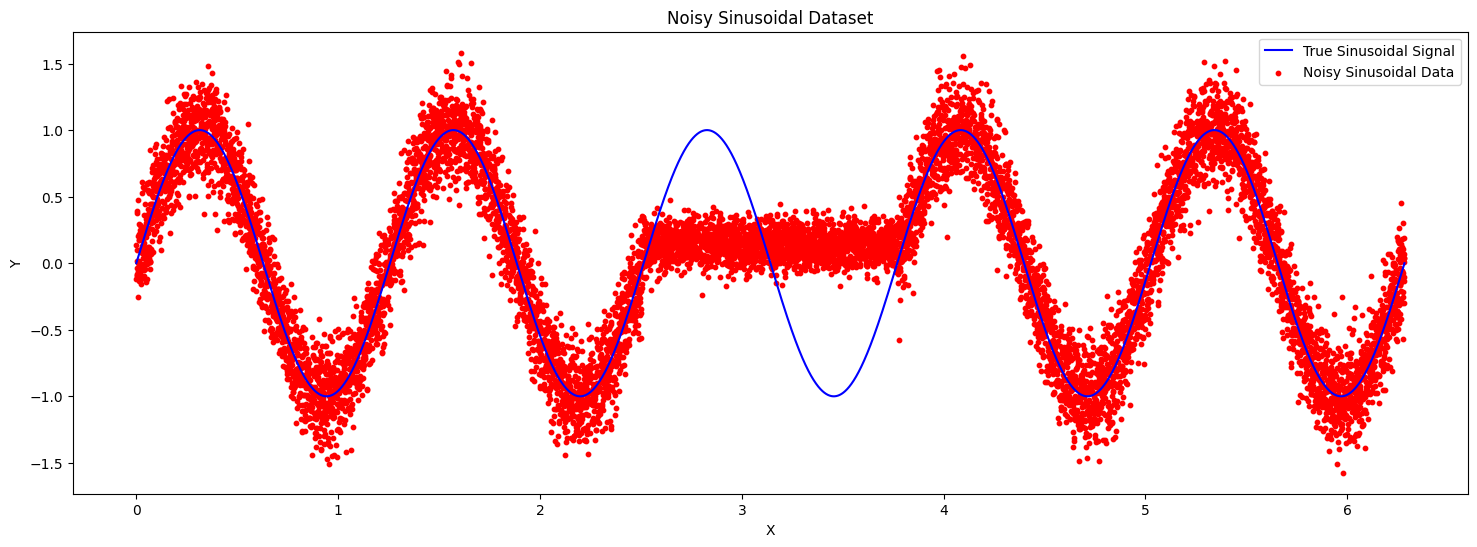

In [38]:
from data_selector.data.create_test_dataset import generate_noisy_sinusoidal, flatten_signal

# Example usage
num_samples = 10000
frequency = 5
noise_level = 0.2  # Adjust the noise level here

x, y_noisy = generate_noisy_sinusoidal(num_samples, frequency, noise_level)
y_flattened = flatten_signal(y_noisy, int(2/5*len(y_noisy)), int(3/5*len(y_noisy)))  # Adjust the start and end indices here

# Plotting the dataset
plt.figure(figsize=(18, 6))
plt.plot(x, np.sin(frequency * x), label='True Sinusoidal Signal', color='blue')
plt.scatter(x, y_flattened, label='Noisy Sinusoidal Data', color='red', s=10)
plt.title('Noisy Sinusoidal Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [39]:
df = pd.DataFrame({'x': x, 'y': y_flattened, 'z':np.sin(frequency * x)})

In [50]:
from data_selector.lasso_data_selector import LassoDataSelector

# Example usage:
# Assuming 'df' is your DataFrame
selector = LassoDataSelector(df, fig_size=(1200,600), marker_size=2)
display(selector.select_data())

# selectore.selected_data contains the currently selected data
# selector.confirmed_data contains the last confirmed data (i.e. the data that was selected when the user last clicked 'Confirm Selection')
# selector.all_confirmed_data contains all the confirmed data as a dictionnary of dataframes (i.e. the data that was selected every time the user clicked 'Confirm Selection')

In [51]:
selector.selected_data

,x,y,z
3460,2.174200,-0.849893,-0.992250
3461,2.174828,-0.705020,-0.992636
3462,2.175456,-1.290891,-0.993012
3463,2.176085,-1.257138,-0.993377
3464,2.176713,-1.095442,-0.993734
...,...,...,...
3573,2.245207,-1.021688,-0.973562
3574,2.245835,-1.019912,-0.972839
3575,2.246463,-0.793122,-0.972107
3576,2.247092,-1.272993,-0.971365


In [52]:
selector.confirmed_data

,x,y,z
3460,2.174200,-0.849893,-0.992250
3461,2.174828,-0.705020,-0.992636
3462,2.175456,-1.290891,-0.993012
3463,2.176085,-1.257138,-0.993377
3464,2.176713,-1.095442,-0.993734
...,...,...,...
3573,2.245207,-1.021688,-0.973562
3574,2.245835,-1.019912,-0.972839
3575,2.246463,-0.793122,-0.972107
3576,2.247092,-1.272993,-0.971365


In [53]:
selector.all_confirmed_data

{1: Empty DataFrame
 Columns: []
 Index: [],
 2:              x         y         z
 3460  2.174200 -0.849893 -0.992250
 3461  2.174828 -0.705020 -0.992636
 3462  2.175456 -1.290891 -0.993012
 3463  2.176085 -1.257138 -0.993377
 3464  2.176713 -1.095442 -0.993734
 ...        ...       ...       ...
 3573  2.245207 -1.021688 -0.973562
 3574  2.245835 -1.019912 -0.972839
 3575  2.246463 -0.793122 -0.972107
 3576  2.247092 -1.272993 -0.971365
 3577  2.247720 -0.716782 -0.970614
 
 [118 rows x 3 columns]}

In [ ]:
#transform all selected data into one dataframe
selected_data = pd.concat([selector.all_confirmed_data[i] for i in list(selector.all_confirmed_data.keys())]).set_index('timestamp')
selected_data